## **Лабораторная работа №7**. Выполнила Бекбоева Айтурсун, группа AIN-2-22
### Работа с текстовыми данными

#### 1)	Изучите материал лекции 12, проделайте пример, описанный в ходе работы. LDA

In [1]:
from sklearn.datasets import load_files
reviews_train = load_files("aclImdb/train/")

text_train, y_train = reviews_train.data, reviews_train.target

In [2]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [3]:
reviews_test = load_files("aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [5]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=10, random_state=0)

document_topics = lda.fit_transform(X)

In [6]:
lda.components_.shape

(10, 10000)

In [7]:
import numpy as np

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

feature_names = np.array(vect.get_feature_names_out())

In [8]:
import mglearn

mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
action        actors        horror        show          show          
game          script        killer        didn          family        
fight         didn          gore          now           father        
guy           nothing       director      10            wife          
john          director      dead          got           woman         
cop           book          blood         want          young         
gets          work          quite         re            mother        
car           worst         house         saw           new           
lee           actually      genre         going         series        
fun           doesn         dark          thought       episode       


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
us  

In [9]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch", max_iter=10, random_state=0)

document_topics100 = lda100.fit_transform(X)

In [10]:
import numpy as np
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names, sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
cagney        fun           mr            effects       french        western       game          
park          gary          jane          special       english       town          lee           
jean          billy         novel         sound         italian       stewart       games         
football      baseball      hudson        ll            la            john          fight         
matt          flash         rochester     bugs          language      west          fu            
day           gordon        timothy       recommend     subtitles     bank          kung          
south         dvd           kyle          thought       karloff       westerns      play          
national      crystal       charlotte     music         miike         president     dragon        
reno      

In [11]:
music = np.argsort(document_topics100[:, 45])[::-1]

for i in music[:10]:
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b'"After the Sunset" - Pierce Bros- nan, Salma Hayek, Woody Harrelson, Naomi Harris, Don Cheadle. Master thief Max (Brosnan) and his lovely accomplice Lola (Hayek) are retired on a paradise island.\n'
b'This film is puree of heist movies: the Comic Heist (Ocean\'s Eleven), the Sexy Heist (The Thomas Crown Affair), the One Last Heist (The Score), and the "Gee, I Kinda Like the Guy I\'m Chasing/Being Chased By " Heist (Heat). The result is a bland time-waster.\n'
b"This was Uma Thurman's first feature film, and she started her acting career right at the very bottom. She is youthful and attractive in this film, but that's all the film has going for it.\n"
b'Surprisingly mild vehicle for Pam Grier, targeted at the black urban audiences of the 1970s, isn\'t terribly good despite a varied roster of bemused supporting talents, including Jim Backus, Yaphet Kotto, Scatman Crothers, Godfrey Cambridge, Carl Weathers from "Rocky", Ted Lange from "The Love Boat", and Eartha Kitt, hamming it up as u

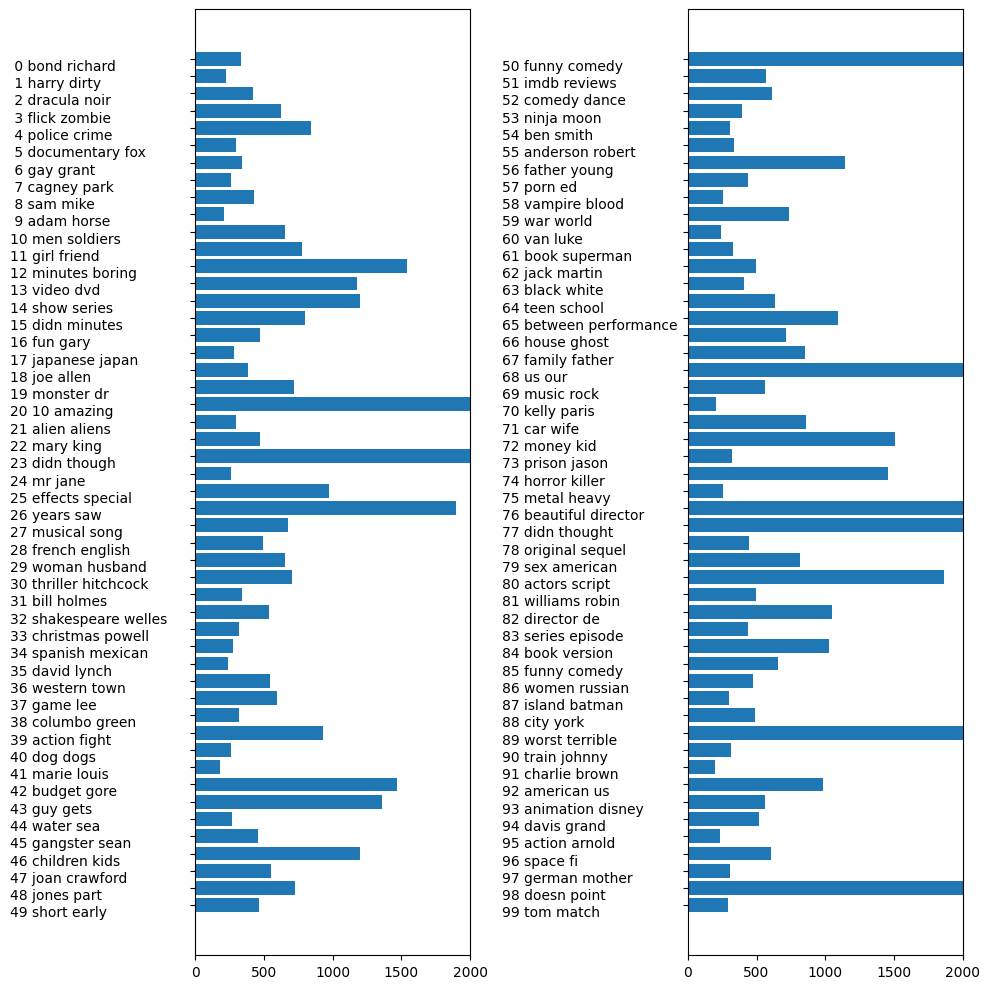

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words) for i, words in enumerate(feature_names[sorting[:, :2]])]

for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

### 2)	Создайте свой «мешок слов», например, набор из 20-25 отзывов о чем-либо, напишите краткое пояснение к данным

Этот набор данных представляет собой мешок слов, включающий 40 текстовых отзывов о странах, разделенных на две группы: 20 позитивных и 20 негативных.

In [13]:
import os

def load_reviews_from_folder(folder_path):
    reviews = []
    labels = []
    for label, subfolder in enumerate(['neg', 'pos']):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.exists(subfolder_path):
            for filename in os.listdir(subfolder_path):
                if filename.endswith('.txt'):
                    with open(os.path.join(subfolder_path, filename), 'r', encoding='utf-8') as file:
                        review_text = file.read().strip()
                        reviews.append(review_text)
                        labels.append(label)
        else:
            print(f"Папка {subfolder} не найдена!")
    
    return reviews, labels

reviews_folder = r'C:\Users\Les\Desktop\bigdata\lab7\landsreviews'

reviews, labels = load_reviews_from_folder(reviews_folder)

print(f"Всего отзывов: {len(reviews)}")
print(f"Позитивных отзывов: {labels.count(1)}")
print(f"Негативных отзывов: {labels.count(0)}")

print("\nПример первых 5 негативных отзывов:")
neg_count = 0
for i in range(len(reviews)):
    if labels[i] == 0:  
        print(f"Отзыв {i+1} (Негативный): {reviews[i]}")
        neg_count += 1
        if neg_count == 5:  
            break

print("\nПример первых 5 позитивных отзывов:")
pos_count = 0
for i in range(len(reviews)):
    if labels[i] == 1:  
        print(f"Отзыв {i+1} (Позитивный): {reviews[i]}")
        pos_count += 1
        if pos_count == 5:  
            break

Всего отзывов: 40
Позитивных отзывов: 20
Негативных отзывов: 20

Пример первых 5 негативных отзывов:
Отзыв 1 (Негативный): В Лиссабоне заметил плохую организацию общественного транспорта, что усложняло передвижение.
Отзыв 2 (Негативный): Многие пляжи Тайланда оказались переполненными туристами, атмосфера уюта теряется.
Отзыв 3 (Негативный): Высокий уровень преступности в некоторых районах Рио заставил чувствовать себя небезопасно.
Отзыв 4 (Негативный): Париж оказался менее романтичным, чем я ожидал. Улицы местами грязные, а обслуживание в ресторанах медленное.
Отзыв 5 (Негативный): Берлин показался слишком хаотичным и неорганизованным, ожидал большего порядка.

Пример первых 5 позитивных отзывов:
Отзыв 21 (Позитивный): Португалия с ее винодельнями и старинными улочками Лиссабона оставила приятное впечатление.
Отзыв 22 (Позитивный): Тайланд удивил своими пляжами и доброжелательной атмосферой. Уличная еда – настоящее открытие.
Отзыв 23 (Позитивный): Рио-де-Жанейро с его пляжами Копакабан

### 3)	Создайте словарь стоп-слов, примените стоп-слова к своему «мешку слов»

In [14]:
def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return [word.strip().lower() for word in f.read().splitlines()]

stopwords_file = r'C:\Users\Les\Desktop\bigdata\lab7\stopwords.txt'
stop_words = load_stopwords(stopwords_file)

sample_review = reviews[0]

filtered_review = ' '.join([word for word in sample_review.split() if word.lower() not in stop_words])

print("Исходный отзыв:")
print(sample_review)
print("\nПример отзыва после удаления стоп-слов:")
print(filtered_review)


Исходный отзыв:
В Лиссабоне заметил плохую организацию общественного транспорта, что усложняло передвижение.

Пример отзыва после удаления стоп-слов:
Лиссабоне заметил плохую организацию общественного транспорта, усложняло передвижение.


### 4)	Масштабируйте данные с помощью tf-idf

In [16]:
import random
from sklearn.feature_extraction.text import TfidfVectorizer

ngram_vectorizer = TfidfVectorizer(ngram_range=(1, 3), stop_words=stop_words, max_features=5000)

X_tfidf = ngram_vectorizer.fit_transform(reviews)

print(f"Размер матрицы TF-IDF: {X_tfidf.shape}")

random_indices = random.sample(range(len(reviews)), 5)

print("\nTF-IDF представление случайных 5 документов:")

for idx in random_indices:
    print(f"\nОтзыв {idx+1}: {reviews[idx]}")
    
    tfidf_vector = X_tfidf[idx].toarray().flatten()
    
    feature_names = ngram_vectorizer.get_feature_names_out()

    tfidf_pairs = list(zip(feature_names, tfidf_vector))
    
    sorted_tfidf = sorted(tfidf_pairs, key=lambda x: x[1], reverse=True)

    print("Топ 10 признаков с наибольшим TF-IDF значением:")
    for feature, tfidf_value in sorted_tfidf[:10]:
        print(f"{feature}: {tfidf_value}")


Размер матрицы TF-IDF: (40, 1001)

TF-IDF представление случайных 5 документов:

Отзыв 36: Чистейший воздух Альп, потрясающие виды гор и комфорт – Швейцария идеальна для зимнего отдыха.
Топ 10 признаков с наибольшим TF-IDF значением:
альп: 0.18315980362861764
альп потрясающие: 0.18315980362861764
альп потрясающие виды: 0.18315980362861764
виды: 0.18315980362861764
виды гор: 0.18315980362861764
виды гор комфорт: 0.18315980362861764
воздух: 0.18315980362861764
воздух альп: 0.18315980362861764
воздух альп потрясающие: 0.18315980362861764
гор: 0.18315980362861764

Отзыв 6: Толпы туристов летом сделали Венецию невыносимой. Также цены были необоснованно высокими.
Топ 10 признаков с наибольшим TF-IDF значением:
венецию: 0.19358295722589683
венецию невыносимой: 0.19358295722589683
венецию невыносимой также: 0.19358295722589683
высокими: 0.19358295722589683
летом: 0.19358295722589683
летом сделали: 0.19358295722589683
летом сделали венецию: 0.19358295722589683
невыносимой: 0.19358295722589683
н

### 5)	Использовать n-gram (1, 2, 3), pipeline(vectorizer, regressor) 

In [17]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=42)

model_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 3), stop_words=stop_words, max_features=5000)),
    ('classifier', SVC(kernel='linear', class_weight='balanced', random_state=42))
])

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



### 6)	Исследуйте коэффициенты модели

In [18]:
model = model_pipeline.named_steps['classifier']  
coef = model.coef_.toarray()  

feature_names = model_pipeline.named_steps['vectorizer'].get_feature_names_out()

coef_with_feature_names = list(zip(feature_names, coef[0]))

sorted_coef = sorted(coef_with_feature_names, key=lambda x: x[1], reverse=True)

print("Топ 10 положительных признаков:")
for feature, coef_value in sorted_coef[:10]:
    print(f"{feature}: {coef_value}")

print("\nТоп 10 отрицательных признаков:")
for feature, coef_value in sorted_coef[-10:]:
    print(f"{feature}: {coef_value}")


Топ 10 положительных признаков:
своей: 0.6014494288101898
культурой: 0.35599480965992863
своей культурой: 0.35599480965992863
пляжами: 0.31995490955251915
просто: 0.3063205312991706
рай: 0.30532298862122376
еда: 0.29567147111808234
отдыха: 0.29195129350172655
острова: 0.286419162749665
место: 0.28597263708588205

Топ 10 отрицательных признаков:
менее: -0.3202496015944213
некоторых: -0.32936105143502814
некоторых районах: -0.32936105143502814
районах: -0.32936105143502814
оказался: -0.36864138614857833
слишком: -0.37020121314947174
многие: -0.3803943856877348
оказались: -0.3803943856877348
но: -0.43426361098511934
сделали: -0.4428685770657421


### 7)	Сделайте выводы по работе


В рамках лабораторной работы был проведен анализ текстовых данных(отзывов) о путешествиях с использованием методов обработки естественного языка (NLP) и машинного обучения. Загружены и подготовлены 20 позитивных и 20 негативных отзывов. Для улучшения качества классификации применены стоп-слова и метод TF-IDF, что позволило преобразовать текстовые данные в числовое представление с учетом значимости слов. Для классификации использовалась модель SVM с линейным ядром, которая продемонстрировала отличные результаты (точность, полнота и F1-score равны 1.0) на тестовых данных. Однако, учитывая малый размер тестовой выборки, результаты могут быть оптимистичными. Рекомендуется использовать кросс-валидацию и более разнообразные данные для более точной оценки модели.